# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

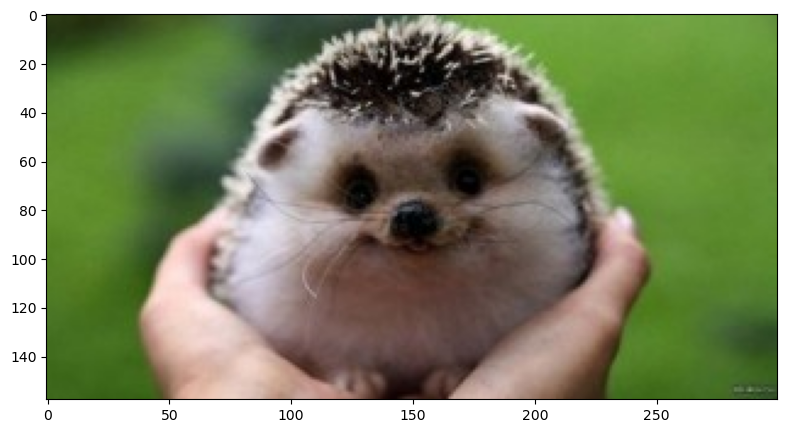

In [13]:
img = cv2.imread('../data/0366ff8a5ea696d2d34b2dc3b90e2ebb.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

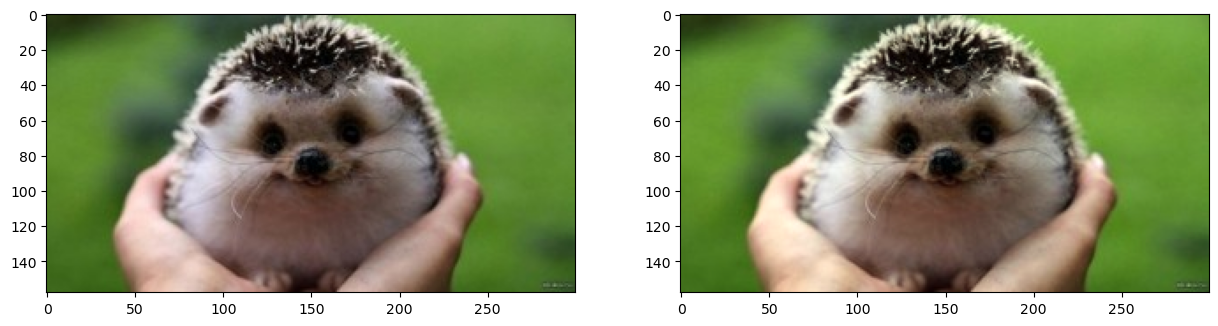

In [30]:
# Define white patch and the coefficients
row, col = 100, 80 #485, 864 
white = img[row, col, :]

w = np.max(white) # Otherwise, this pixel will be as bright as possible
# coeffs = 255.0/white 
coeffs = w/white # This preserves the brightness

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)
plt.show()

### Gray world
This algorithm assumes that a scene, on average, is gray.

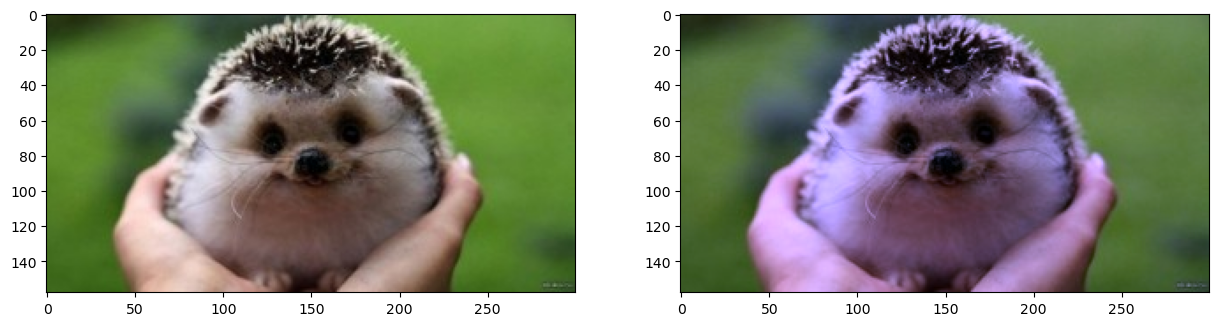

In [15]:
# Load your image
img = cv2.imread('../data/0366ff8a5ea696d2d34b2dc3b90e2ebb.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[..., 0])
mean_g = np.mean(img[..., 1])
mean_b = np.mean(img[..., 2])

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
mean = (mean_r+mean_g+mean_b)/3.0
kr = mean/mean_r
kg = mean/mean_g
kb = mean/mean_b
coeffs = np.array([kr, kg, kb])
# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)
plt.show()

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

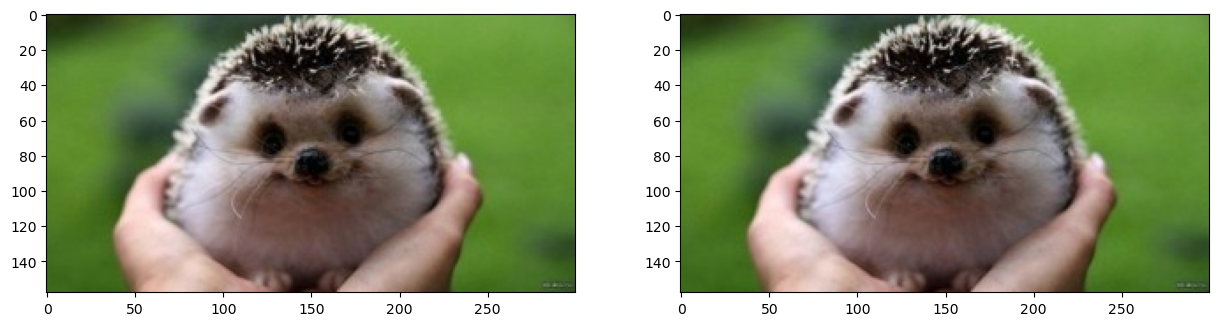

In [34]:
# Load your image
img = cv2.imread('../data/0366ff8a5ea696d2d34b2dc3b90e2ebb.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[..., 0])
max_g = np.max(img[..., 1])
max_b = np.max(img[..., 2])

# Apply scale-by-max balancing and generate the balanced image
max_w = max(max_r, max_g, max_b)
kr = max_w/max_r
kg = max_w/max_g
kb = max_w/max_b
coeffs = np.array([kr, kg, kb])
# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)
plt.show()

In [17]:
import ipywidgets as widgets
from ipywidgets import interact

In [33]:
methods = ['Wite pixel', 'Gray world', 'Scale by max', 'Nothing']

@interact
def interactive_color_balancer(method=methods):
    print(method)
    # Load your image
    img = cv2.imread('../data/0366ff8a5ea696d2d34b2dc3b90e2ebb.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    coeffs = np.array([1.0, 1.0, 1.0])
    if method==methods[0]:
        row, col = 100, 80 #485, 864 
        white = img[row, col, :]
        w = np.max(white)
        coeffs = w/white
    elif method==methods[1]:
        mean_r = np.mean(img[..., 0])
        mean_g = np.mean(img[..., 1])
        mean_b = np.mean(img[..., 2])
        mean = (mean_r+mean_g+mean_b)/3.0
        kr = mean/mean_r
        kg = mean/mean_g
        kb = mean/mean_b
        coeffs = np.array([kr, kg, kb])
    elif method==methods[2]:
        max_r = np.max(img[..., 0])
        max_g = np.max(img[..., 1])
        max_b = np.max(img[..., 2])
        max_w = max(max_r, max_g, max_b)
        kr = max_w/max_r
        kg = max_w/max_g
        kb = max_w/max_b
        coeffs = np.array([kr, kg, kb])
    else:
        print(f'Method "{method}" not realised.')
        return
    # Apply white balancing and generate balanced image
    print('Coeffs: ', end='')
    print(coeffs)
    balanced = np.zeros_like(img, dtype=np.float32)
    for channel in range(3):
        balanced[..., channel] = img[..., channel] * coeffs[channel]

    # White patching does not guarantee that the dynamic range is preserved, images must be clipped.
    balanced = balanced/255
    print(f'Maximum pixel value before clipped: {np.max(balanced):.3f}')
    balanced[balanced > 1] = 1
    plt.subplot(121), plt.imshow(img)
    plt.subplot(122), plt.imshow(balanced)
    plt.show()
    return


interactive(children=(Dropdown(description='method', options=('Wite pixel', 'Gray world', 'Scale by max', 'Not…